In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
from rdkit import Chem
from rdkit.Chem import RDConfig
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import DataStructs
from sklearn.decomposition import PCA
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from mpld3 import plugins
mpld3.enable_notebook()

#https://stackoverflow.com/questions/47380865/json-serialization-error-using-matplotlib-mpld3-with-linkedbrush

In [8]:
def fp2arr(fp):
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp,arr)
    return arr

# Original code is described in the rdkit blog post.
# http://rdkit.blogspot.com/2015/02/new-drawing-code.html

def moltosvg(mol,molSize=(225,75),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

In [9]:
fpgen = rdFingerprintGenerator.GetMorganGenerator(2)
mols = [m for m in Chem.SDMolSupplier(os.path.join(RDConfig.RDDocsDir,'Book/data/cdk2.sdf'))]
for m in mols:
    AllChem.Compute2DCoords(m)
fps = [fpgen.GetFingerprint(m) for m in mols]
X = np.asarray([fp2arr(fp) for fp in fps])
X.shape

(47, 2048)

In [10]:
pca = PCA(n_components=3)
res = pca.fit_transform(X)

In [11]:
svgs = [moltosvg(m) for m in mols]

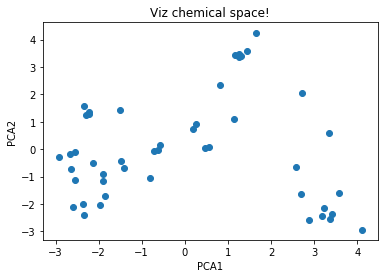

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_title('Viz chemical space!')
points = ax.scatter(res[:,0], res[:,1])
tooltip = plugins.PointHTMLTooltip(points, svgs)
plugins.connect(fig, tooltip)